In [32]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline 

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1119,1459-QNFQT,Male,0,Yes,Yes,70,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),59.50,4144.8,No
2653,9481-WHGWY,Female,0,Yes,Yes,70,Yes,No,DSL,Yes,...,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),75.35,5437.75,No
3480,6060-QBMGV,Male,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.85,1433.8,No
4678,3006-XIMLN,Female,0,No,Yes,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.20,193.8,Yes
6816,2446-PLQVO,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.3,Yes


In [4]:
df.drop("customerID", axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1 = df[df.TotalCharges != ' ']
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3326,Male,1,No,No,38,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,2497.35,Yes
5954,Male,0,No,No,20,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),55.00,1165.55,No
1427,Male,1,No,No,44,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,73.85,3122.4,No
816,Female,0,No,No,2,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check,86.20,178.7,Yes
6121,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.50,159.35,No


In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.values

C:\Users\luizh\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

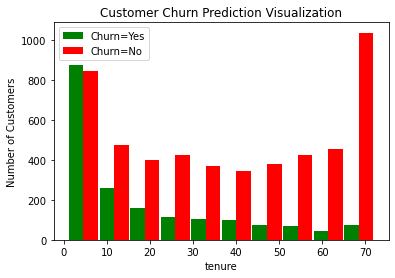

In [10]:
# Data visualization 
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green', 'red'], 
         label=['Churn=Yes','Churn=No'])
plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.legend()

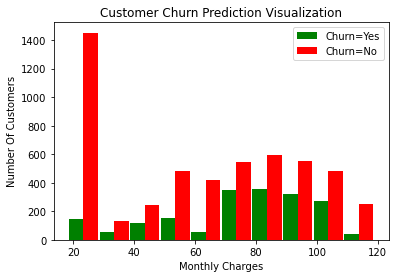

In [12]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green', 'red'], 
         label=['Churn=Yes','Churn=No'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.legend()

In [13]:
#Print unique values 
def print_unique_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')
print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
df1.replace("No internet service", "No", inplace=True)
df1.replace("No phone service", "No", inplace=True)

print_unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\Users\luizh\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
#Replace gender 
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
df1.gender.unique()

C:\Users\luizh\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([1, 0], dtype=int64)

In [19]:
#Convert value of columns to 0 and 1 
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\luizh\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
#One hot encoding for categorical columns using pandas get dummies 
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1551,0,0,0,0,22,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
6798,1,0,0,0,13,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2701,1,0,1,1,61,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2157,0,0,1,0,51,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
460,0,0,0,1,6,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [21]:
#Scale values 
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df2[columns] = scaler.fit_transform(df2[columns])

df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2046,1,0,0,1,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
6565,0,0,1,0,0.845070,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0
6070,0,0,1,1,0.845070,1,1,0,0,1,...,1,0,0,0,0,1,1,0,0,0
5562,1,1,1,0,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1670,0,1,0,1,0.000000,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [23]:
#Split train and test 
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(5625, 26)

In [27]:
#Build a neural network using tensorflow 
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(12, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(optimizer='adam', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.4960 - accuracy: 0.7611
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.7980
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8037
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8014
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8094
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8128
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8117
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4049 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8270
Epoch 81/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8308
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8276
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8274
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8288
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8260
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8284
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8316
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8295
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 

In [28]:
#Evaluate model 
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7747


[0.4813213646411896, 0.7746979594230652]

In [31]:
#Predict
yp = model.predict(X_test)

y_pred = [1 if i > 0.5 else 0 for i in yp]
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [33]:
#Print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1033
           1       0.60      0.45      0.52       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

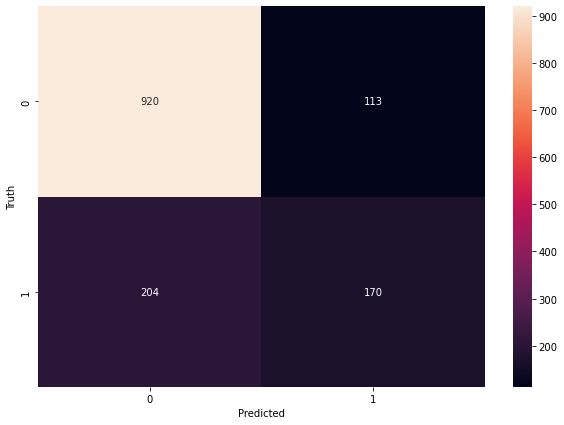

In [34]:
#Plot confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')